### GradientBoostingClassifier

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_bc0f4cba4d05460680c67845b572e520.csv"
missing_values=["?"]
df=pd.read_csv(url,header=None,na_values=missing_values)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:
df.shape

(303, 14)

In [3]:
df.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13    False
dtype: bool

In [4]:
df.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9     float64
10      int64
11    float64
12    float64
13      int64
dtype: object

In [5]:
df=df.fillna(df.median())
df.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

In [6]:
X=df.iloc[:,0:13]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [7]:
y=pd.DataFrame(df.iloc[:,13]).rename(columns={13:"Label"})
y.head()

,Label
0,0
1,2
2,1
3,0
4,0


In [8]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4])

In [9]:
y=y.replace([1,2,3,4],1)
np.unique(y)

array([0, 1])

In [10]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
12,112.770163
11,80.800610
8,69.020891
9,66.166707
7,63.419223
2,62.423779
10,39.138194
1,24.978872
0,15.769637
6,8.871394


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [13]:
df_t=pd.concat([X_train,y_train],axis=1)
df_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Label
132,-2.819115,0.686202,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,2.294182,-0.696631,-0.896862,-0.976352,-0.711131,-0.890238,0
202,0.283813,0.686202,-0.165268,1.042090,-2.334877,2.394438,-0.996749,1.024325,-0.696631,-0.724323,-0.976352,0.360873,1.176752,0
196,1.613640,0.686202,-2.251775,1.611220,-0.245555,2.394438,1.016684,-0.814778,-0.696631,-0.810592,0.649113,0.360873,-0.890238,0
75,1.170364,-1.457296,-0.165268,1.611220,2.191988,-0.417635,1.016684,0.060985,-0.696631,-0.206705,-0.976352,-0.711131,-0.890238,0
176,-0.270281,0.686202,0.877985,-1.348256,-0.264900,2.394438,-0.996749,-0.114167,-0.696631,-0.810592,-0.976352,2.504881,1.176752,0


In [14]:
df_t.groupby("Label").count().T

Label,0,1
0,135,107
1,135,107
2,135,107
3,135,107
4,135,107
5,135,107
6,135,107
7,135,107
8,135,107
9,135,107


In [15]:
df_t1=df_t[df_t["Label"]==1]
df_t1=pd.concat([df_t1]*2,axis=0)
df_t0=df_t[df_t["Label"]==0]
df_t=pd.concat([df_t1,df_t0],axis=0)
X_train=df_t.drop(["Label"],axis=1)
y_train=df_t[["Label"]]

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(loss='deviance',learning_rate=0.025,n_estimators=3900,subsample=0.15,max_features='sqrt',criterion="mse",max_depth=10,min_samples_split=2,min_samples_leaf=1,warm_start=False,validation_fraction=0.2,random_state=0).fit(X_train,y_train)
gradient

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(criterion='mse', learning_rate=0.025, max_depth=10,
                           max_features='sqrt', n_estimators=3900,
                           random_state=0, subsample=0.15,
                           validation_fraction=0.2)

In [17]:
from sklearn.metrics import accuracy_score
y0_pred=gradient.predict(X_train)
print("Accuracy on train data is: ",accuracy_score(y_train,y0_pred))
y1_pred=gradient.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y1_pred))

Accuracy on train data is:  1.0
Accuracy on test data is:  0.9016393442622951


In [18]:
from sklearn.metrics import roc_auc_score
print("AUC train data is: ",roc_auc_score(y_train,y0_pred))
print("AUC test data is: ",roc_auc_score(y_test,y1_pred))

AUC train data is:  1.0
AUC test data is:  0.9030172413793103


Confusion matrix, without normalization
[[27  2]
 [ 4 28]]
Normalized confusion matrix
[[0.931 0.069]
 [0.125 0.875]]


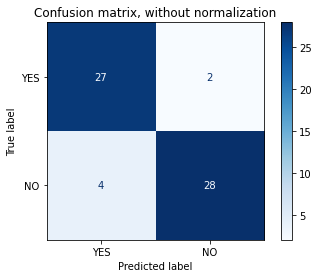

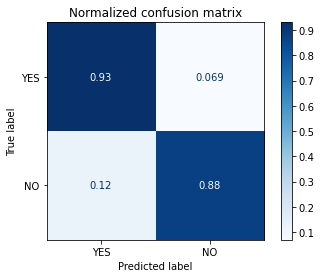

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names=["YES","NO"]
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [20]:
from sklearn.metrics import classification_report
print("Classification report on train data is: \n",classification_report(y_train,y0_pred))

Classification report on train data is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       214

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



In [21]:
print("Classification report on test data is: \n",classification_report(y_test,y1_pred))

Classification report on test data is: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### RandomForestClassifier

In [189]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=700,criterion="entropy",max_depth=5,min_samples_split=3,min_samples_leaf=1,max_features="sqrt",bootstrap=True,oob_score=True,n_jobs=-1,warm_start=True,class_weight="balanced",ccp_alpha=0.2,random_state=0).fit(X_train,y_train)
forest

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


RandomForestClassifier(ccp_alpha=0.2, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=3, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=0, warm_start=True)

In [190]:
y0_pred=forest.predict(X_train)
print("Accuracy on train data is: ",accuracy_score(y_train,y0_pred))
y1_pred=forest.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y1_pred))

Accuracy on train data is:  0.8305785123966942
Accuracy on test data is:  0.9180327868852459


In [191]:
print("AUC train data is: ",roc_auc_score(y_train,y0_pred))
print("AUC test data is: ",roc_auc_score(y_test,y1_pred))

AUC train data is:  0.8229491173416406
AUC test data is:  0.9170258620689655


In [192]:
print("Classification report on test data is: \n",classification_report(y_test,y1_pred))

Classification report on test data is: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Confusion matrix, without normalization
[[26  3]
 [ 2 30]]
Normalized confusion matrix
[[0.897 0.103]
 [0.062 0.938]]


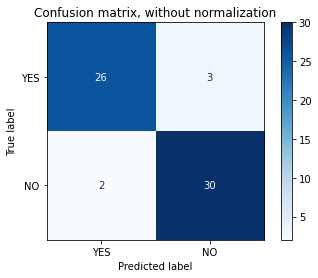

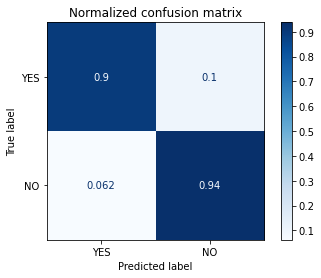

In [193]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names=["YES","NO"]
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(forest, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Neural Network

In [29]:
pip install tensorflow

     |████████████████████████████████| 320.4 MB 12 kB/s s eta 0:00:01   |██▋                             | 25.7 MB 4.2 MB/s eta 0:01:10     |███▌                            | 34.9 MB 4.2 MB/s eta 0:01:08     |████                            | 39.5 MB 43.1 MB/s eta 0:00:07     |██████                          | 60.8 MB 43.1 MB/s eta 0:00:07     |██████████████████████▋         | 226.6 MB 48.1 MB/s eta 0:00:02     |███████████████████████▋        | 236.2 MB 48.1 MB/s eta 0:00:02
     |████████████████████████████████| 127 kB 31.6 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 3.8 kB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 459 kB 28.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 27.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 33.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.2 MB/s  eta 0:00:01
     |█████████████████████████████

In [30]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [14]:
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

In [15]:
from sklearn.preprocessing import OneHotEncoder
ienc=OneHotEncoder(handle_unknown="ignore")
y_train=ienc.fit_transform(y_train)
y_train=pd.DataFrame(y_train.toarray())
y_train.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [16]:
y_test=ienc.fit_transform(y_test)
y_test=pd.DataFrame(y_test.toarray())
y_test.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [17]:
length=X_train.shape[1]
num_classes=y_test.shape[1]
print(length)
print(num_classes)

13
2


In [32]:
def classification_model():
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(70, activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(70,activation="relu"))
    model.add(Dropout(0.35))
    model.add(Dense(70,activation="relu"))
    model.add(Dropout(0.35))
    model.add(Dense(70,activation="relu"))
    model.add(Dropout(0.35))
    model.add(Dense(num_classes, activation='softmax'))
    opt=Adam(lr=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=13, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 242 samples, validate on 61 samples
Epoch 1/13
 - 3s - loss: 0.7319 - acc: 0.4711 - val_loss: 0.6413 - val_acc: 0.8197
Epoch 2/13
 - 0s - loss: 0.6761 - acc: 0.5909 - val_loss: 0.6092 - val_acc: 0.8525
Epoch 3/13
 - 0s - loss: 0.6593 - acc: 0.6198 - val_loss: 0.5799 - val_acc: 0.8361
Epoch 4/13
 - 0s - loss: 0.6210 - acc: 0.6942 - val_loss: 0.5444 - val_acc: 0.8689
Epoch 5/13
 - 0s - loss: 0.5782 - acc: 0.6983 - val_loss: 0.4942 - val_acc: 0.8689
Epoch 6/13
 - 0s - loss: 0.5807 - acc: 0.6901 - val_loss: 0.4558 - val_acc: 0.8689
Epoch 7/13
 - 0s - loss: 0.5244 - acc: 0.7727 - val_loss: 0.4113 - val_acc: 0.8852
Epoch 8/13
 - 0s - loss: 0.5517 - acc: 0.7562 - val_loss: 0.3788 - val_acc: 0.8852
Epoch 9/13
 - 0s - loss: 0.5078 - acc: 0.7975 - val_loss: 0.3584 - val_acc: 0.8852
Epoch 10/13
 - 0s - loss: 0.4713 - acc: 0.8058 - val_loss: 0.3489 - val_acc: 0.8689
Epoch 11/13
 - 0s - loss: 0.4895 - acc: 0.7893 - val_loss: 0.3414 - val_acc: 0.8689
Epoch 12/13
 - 0s - loss: 0.5163 - acc: 

[0.3306629652859735, 0.9016393374224179]

In [38]:
from sklearn.metrics import roc_auc_score
y0_pred=model.predict(X_train)
y1_pred=model.predict(X_test)
print("AUC on train data is: ",roc_auc_score(y_train,y0_pred))
print("AUC on test data is: ",roc_auc_score(y_test,y1_pred))

AUC on train data is:  0.8977500865351332
AUC on test data is:  0.9299568965517242


In [39]:
y1_pred=round(pd.DataFrame(y1_pred),1).rename(columns={0:"NEG",1:"POS"})
y1_pred

,NEG,POS
0,0.9,0.1
1,0.1,0.9
2,0.2,0.8
3,0.2,0.8
4,0.2,0.8
...,...,...
56,0.8,0.2
57,0.1,0.9
58,0.0,1.0
59,0.2,0.8


In [66]:
y_test=y_test.rename(columns={0:"NEG_t",1:"POS_t"})
comparison=pd.concat([y_test,y1_pred],axis=1)
comparison

,NEG_t,POS_t,NEG,POS
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
56,1.0,0.0,1.0,0.0
57,0.0,1.0,0.0,1.0
58,0.0,1.0,0.0,1.0
59,0.0,1.0,0.0,1.0


In [67]:
length1=len(y_test[y_test["POS_t"]==1])
print("Number of postive cases in test data: ",length1)

Number of postive cases in test data:  32


In [68]:
length3=len(y_test[y_test["NEG_t"]==1])
print("Number of negative cases in test data: ",length3)

Number of negative cases in test data:  29


In [72]:
length2=len(y1_pred[y1_pred["NEG"]==1])
print("Number of negative cases in predictions: ", length2)

Number of negative cases in predictions:  31


In [73]:
print("Number of positive cases in predictions: ",61-length2)

Number of positive cases in predictions:  30


In [74]:
print("Confusion matrix for test data: \n")
np.array([[30,2],[0,29]])

Confusion matrix for test data: 



array([[30,  2],
       [ 0, 29]])

### GaussianProcessClassifier

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [152]:
from sklearn.gaussian_process import GaussianProcessClassifier
gaussian=GaussianProcessClassifier(max_iter_predict=250,n_jobs=-1,random_state=0).fit(X_train,y_train)
gaussian

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianProcessClassifier(max_iter_predict=250, n_jobs=-1, random_state=0)

In [153]:
y0_pred=gaussian.predict(X_train)
print("Accuracy on train data is: ",accuracy_score(y_train,y0_pred))
y1_pred=gaussian.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y1_pred))

Accuracy on train data is:  0.9958677685950413
Accuracy on test data is:  0.9180327868852459


In [154]:
print("AUC train data is: ",roc_auc_score(y_train,y0_pred))
print("AUC test data is: ",roc_auc_score(y_test,y1_pred))

AUC train data is:  0.9953271028037383
AUC test data is:  0.9202586206896552


Confusion matrix, without normalization
[[28  1]
 [ 4 28]]
Normalized confusion matrix
[[0.966 0.034]
 [0.125 0.875]]


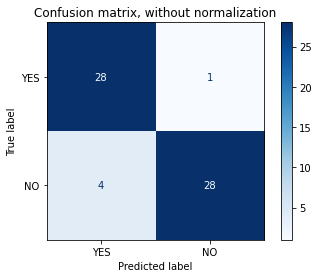

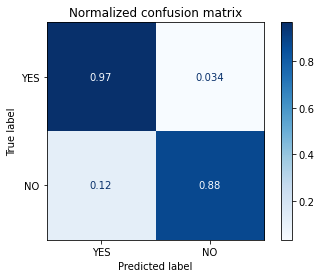

In [155]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names=["YES","NO"]
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gaussian, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [156]:
print("Classification report on test data is: \n",classification_report(y_test,y1_pred))

Classification report on test data is: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

